<a href="https://colab.research.google.com/github/willkakuta/Wallmart-Project/blob/main/DeliverableWallmart_WillianKakuta_RID29018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deliverable 2 - Wallmart

Nome: Willian Kakuta

RID: 29018

Turma: DS05

Importando as bibliotecas.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

Importando o Dataset


In [ ]:
df = pd.read_csv("Walmart.csv")

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Olhando as informações, se existe algum número nulo, tipo da informações, tamanho.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Identificando as lojas que mais vendem e suas médias.

In [ ]:
df_mean = df.groupby(['Store']).mean()

df_mean.sort_values(by = ['Weekly_Sales'], ascending=False).round(2).head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,2107676.87,0.07,55.45,3.42,209.04,7.37
4,2094712.96,0.07,62.25,3.22,128.68,5.96
14,2020978.40,0.07,57.79,3.42,186.29,8.65
13,2003620.31,0.07,53.70,3.29,128.68,7.00
2,1925751.34,0.07,68.22,3.22,215.65,7.62


Gráfico seria a mesma informação da tabela de Média de Vendas semanais, mas com uma vizualização melhor e mais estética dos dados.

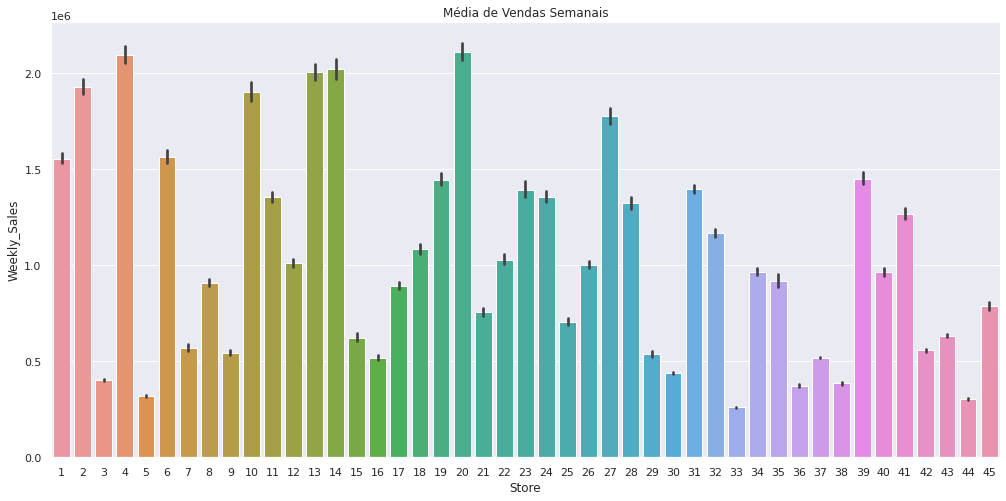

In [ ]:
ax = sns.barplot(x='Store', y="Weekly_Sales", data=df)
ax.figure.set_size_inches(17, 8)
plt.title('Média de Vendas Semanais');

Criação da matriz de correlação para ver se algum dado se correlaciona com outro.

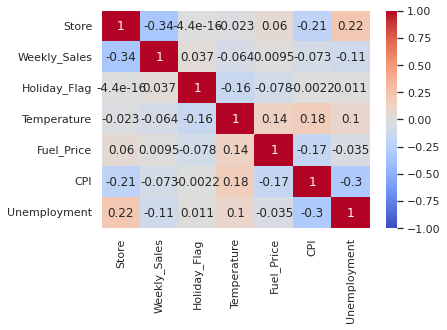

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

Infelizmente, não foi encontrado nenhuma correlação forte entre os dados. Nada relevante para o desenvolvimento de uma ideia.

Aqui somamos todas as vendas das lojas e separamos as 5 lojas com os maiores faturamento.

In [ ]:
dfsoma = df.groupby(['Store']).sum()

dfsoma.sort_values(by=['Weekly_Sales'], ascending=False).round().head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301397792.0,10,7930.0,489.0,29892.0,1054.0
4,299543953.0,10,8902.0,460.0,18401.0,853.0
14,288999911.0,10,8264.0,489.0,26639.0,1237.0
13,286517704.0,10,7679.0,470.0,18401.0,1001.0
2,275382441.0,10,9755.0,460.0,30837.0,1090.0


Separamos as lojas 20, 4 e 14. Pois além de sua média de vendas, faturamento total ser maior, a quantidade de semanas performando acima da média também são maiores em relação as outras lojas.

Como a quantidade de dados é muito grande, resolvi fazer um gráfico somente com as vendas que foram acima da média para identificar se os feriados influenciavam positivamente as vendas. Como tenho conhecimento da média de vendas das lojas, resolvi botar todas as datas de feriados para ver se em alguma data em específico impactava negativamente as vendas das lojas.

In [ ]:
store20 = df[df['Store'] == 20]
store20 = store20[store20['Weekly_Sales'] > store20['Weekly_Sales'].mean()]

store20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,02-04-2010,2405395.22,0,51.00,2.850,204.025284,7.856
2730,20,07-05-2010,2137202.38,0,66.74,2.966,203.610178,7.856
2734,20,04-06-2010,2203619.35,0,72.52,2.847,204.404288,7.856
2738,20,02-07-2010,2143676.77,0,70.10,2.815,204.465056,7.527
2747,20,03-09-2010,2121561.41,0,75.50,2.715,204.758357,7.527
2756,20,05-11-2010,2184316.64,0,42.78,2.917,205.160837,7.484


In [ ]:
store20.shape

(52, 8)

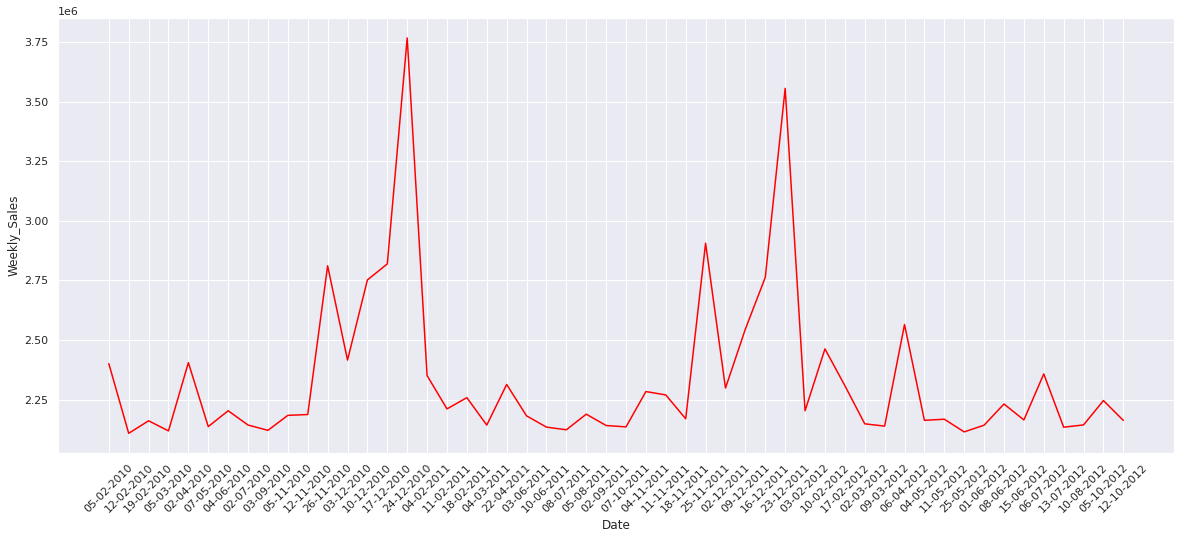

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.set_theme(style='darkgrid')
sns.lineplot(data=store20, x='Date', y='Weekly_Sales', color='red');

In [ ]:
holiday20 = df[(df['Store'] == 20) & (df['Holiday_Flag'] == 1)]

holiday20

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2748,20,10-09-2010,2014954.79,1,65.02,2.699,204.726683,7.527
2759,20,26-11-2010,2811634.04,1,46.66,3.039,204.962100,7.484
2764,20,31-12-2010,1799737.79,1,28.85,3.179,204.643227,7.484
2770,20,11-02-2011,2211388.14,1,25.38,3.239,206.076386,7.343
2800,20,09-09-2011,2050542.56,1,68.74,3.738,209.022556,7.274
2811,20,25-11-2011,2906233.25,1,46.38,3.492,211.412076,7.082
2816,20,30-12-2011,2043245.00,1,36.35,3.389,212.403576,7.082
2822,20,10-02-2012,2462978.28,1,33.47,3.640,213.118614,6.961
2852,20,07-09-2012,2080529.06,1,76.36,3.911,215.218957,7.280


In [ ]:
store4 = df[df['Store'] == 4]
store4 = store4[store4['Weekly_Sales'] > store4['Weekly_Sales'].mean()]

store4

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
429,4,05-02-2010,2135143.87,0,43.76,2.598,126.442065,8.623
430,4,12-02-2010,2188307.39,1,28.84,2.573,126.496258,8.623
470,4,19-11-2010,2097809.40,0,48.05,2.780,126.607200,7.127
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
472,4,03-12-2010,2102530.17,0,46.40,2.727,126.731333,7.127
...,...,...,...,...,...,...,...,...
566,4,21-09-2012,2119438.53,0,68.97,3.721,131.010333,4.077
568,4,05-10-2012,2209835.43,0,63.07,3.620,131.075667,3.879
569,4,12-10-2012,2133026.07,0,57.11,3.603,131.108333,3.879
570,4,19-10-2012,2097266.85,0,64.46,3.610,131.149968,3.879


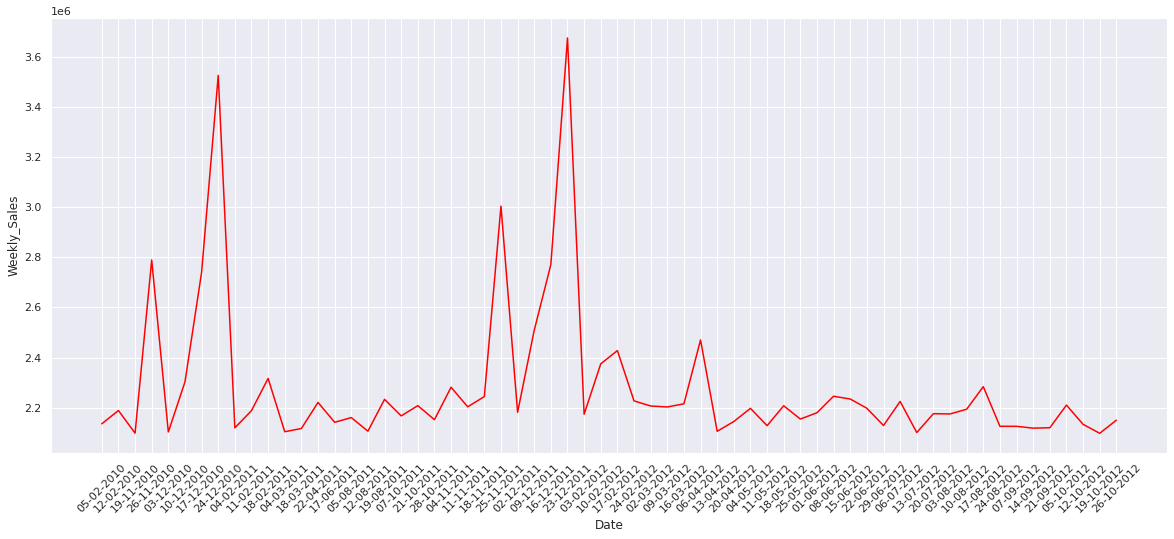

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.set_theme(style='darkgrid')
sns.lineplot(data=store4, x='Date', y='Weekly_Sales', color='red');

In [ ]:
holiday4 = df[(df['Store'] == 4) & (df['Holiday_Flag'] == 1)]

holiday4

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
430,4,12-02-2010,2188307.39,1,28.84,2.573,126.496258,8.623
460,4,10-09-2010,1865820.81,1,73.54,2.574,126.114581,7.372
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
476,4,31-12-2010,1794868.74,1,38.09,2.955,127.087677,7.127
482,4,11-02-2011,2187847.29,1,33.29,3.033,127.859129,6.510
512,4,09-09-2011,2093139.01,1,73.34,3.554,129.368613,5.644
523,4,25-11-2011,3004702.33,1,47.96,3.225,129.836400,5.143
528,4,30-12-2011,2007105.86,1,36.89,3.119,130.071032,5.143
534,4,10-02-2012,2374660.64,1,33.00,3.411,130.384903,4.607
564,4,07-09-2012,2125104.72,1,82.09,3.709,130.932548,4.077


In [ ]:
store14 = df[df['Store'] == 14]
store14 = store14[store14['Weekly_Sales'] > store14['Weekly_Sales'].mean()]

store14

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1859,14,05-02-2010,2623469.95,0,27.31,2.784,181.871190,8.992
1861,14,19-02-2010,2204556.70,0,31.27,2.745,182.034782,8.992
1862,14,26-02-2010,2095591.63,0,34.89,2.754,182.077469,8.992
1863,14,05-03-2010,2237544.75,0,37.13,2.777,182.120157,8.992
1864,14,12-03-2010,2156035.06,0,45.80,2.818,182.162844,8.992
...,...,...,...,...,...,...,...,...
1964,14,10-02-2012,2077256.24,1,37.00,3.640,189.707605,8.424
1972,14,06-04-2012,2376022.26,0,49.73,3.996,190.685171,8.567
1979,14,25-05-2012,2030869.61,0,67.21,3.798,191.002810,8.567
1980,14,01-06-2012,2049485.49,0,74.48,3.742,191.009171,8.567


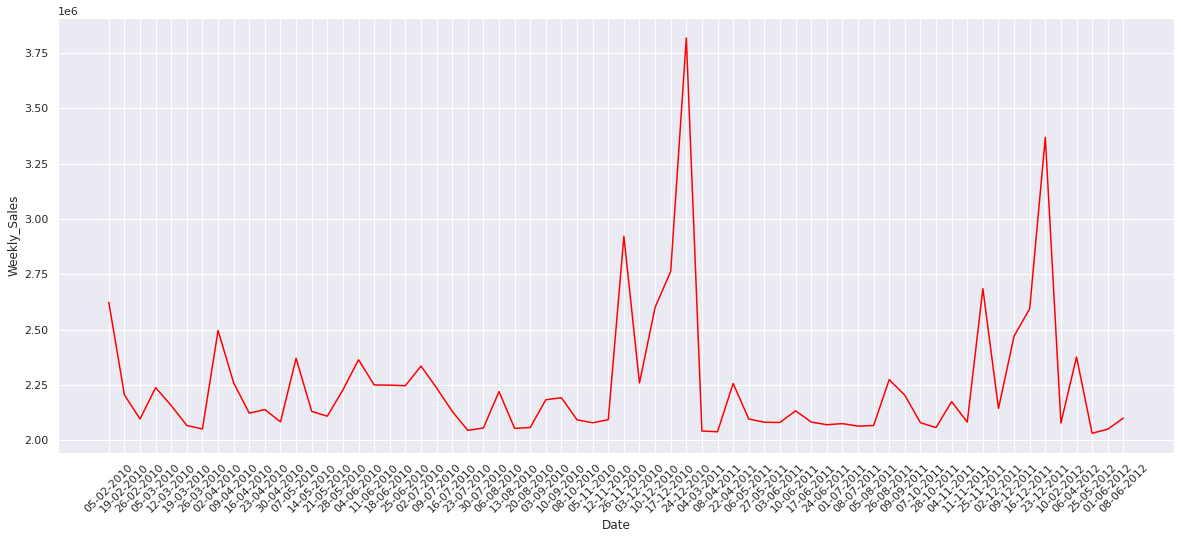

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.set_theme(style='darkgrid')
sns.lineplot(data=store14, x='Date', y='Weekly_Sales', color='red');

In [ ]:
holiday14 = df[(df['Store'] == 14) & (df['Holiday_Flag'] == 1)]

holiday14

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1860,14,12-02-2010,1704218.84,1,27.73,2.773,181.982317,8.992
1890,14,10-09-2010,2191767.76,1,70.87,2.699,182.598178,8.743
1901,14,26-11-2010,2921709.71,1,46.15,3.039,182.783277,8.724
1906,14,31-12-2010,1623716.46,1,29.67,3.179,182.571448,8.724
1912,14,11-02-2011,1980405.03,1,30.30,3.239,183.701613,8.549
1942,14,09-09-2011,2202742.90,1,71.48,3.738,186.673738,8.625
1953,14,25-11-2011,2685351.81,1,48.71,3.492,188.350400,8.523
1958,14,30-12-2011,1914148.89,1,37.79,3.389,189.062016,8.523
1964,14,10-02-2012,2077256.24,1,37.00,3.640,189.707605,8.424
1994,14,07-09-2012,1904512.34,1,75.70,3.911,191.577676,8.684


Com base nas tabelas e os gráficos, constatamos que há um pico de vendas nos feriados de Ação de Graças, e o maior pico de vendas é uma semana antes do Natal, tendo uma queda no feriado da semana do dia 31/12 (Ano Novo). Mas essas informações não influenciarão na decisão final, pois todas as lojas tendem a ter o mesmo comportamento.

Analisando todas as informações apresentadas.
A loja que acredito que seja a melhor para expansão será a loja 4.
Pois além de não ter diferença significativa nos valores de média de vendas e venda total comparando a loja 20. A loja 4 teve 10 semanas a mais de vendas acima da média que a loja 20, onde podemos dizer que é uma loja mais estável. Além de apresentar o índice de preços ao consumidor(CPI) muito menor que as outras lojas, gasolina mais barata e a taxa de desemprego da região que baixou de 8% para abaixo de 4%, sendo que as outras não obtiveram mudanças. Isso nos mostra que a loja 4 se encontra em um ambiente mais estável, com uma economia mais consolidada. 